In [1]:
from google.colab import drive
drive.mount('./drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./drive


In [2]:
!ls './drive/My Drive/Thesis Work'

 CambridgeMonoPhoneDf.pickle	      Implementation5
'Cambridge Phones'		      Implementation6
 CambridgeWordFeaturesDf.pickle       Implementation6.ipynb
 CheckScrapSpeed.ipynb		      L2monoPhoneDfTest.pickle
 ConvertToWav.ipynb		      L2monoPhoneDfTrain.pickle
'Copy of Benchmark.ipynb'	     'L2 Phones'
'Copy of l2arctic_release_v2.0.zip'   L2WordFeaturesDfTest.pickle
 DelIfCopiesFine.ipynb		      L2WordFeaturesDfTrain.pickle
 Implementation1		      MostCommon3000Oxford.txt
 Implementation1.ipynb		      OutlierDetection.ipynb
 Implementation2		     'PYOD Examples'
 Implementation2.ipynb		      SVMPhoneLevelCamb.ipynb
 Implementation3		      SVMPhoneLevel.ipynb
 Implementation3.ipynb		      TrainPhonesCambAutoencoder.ipynb
 Implementation4		      UKpronunciations
 Implementation4.ipynb		      USpronunciations


Bism  
# Imports

In [0]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import os

#SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import sklearn.metrics as sklm
from sklearn.manifold import TSNE

# Implementation 9  (PHONE LEVEL)
## Using Cambridge as Training set
## L2 as val+test set
## OSVM

In [2]:
phones = [file[:-4] for file in os.listdir('./drive/My Drive/Thesis Work/Cambridge Phones/')]
phones[3]

'P'

In [0]:
phone = 'AA'

### Training

#### X_TRAIN

In [97]:
X_train = np.load('./drive/My Drive/Thesis Work/Cambridge Phones/'+phone+'.npy')
X_train = X_train.reshape(X_train.shape[0],-1)
np.random.shuffle(X_train)
X_train.shape

(275, 1950)

#### X_TEST & Y_TEST

In [98]:
X_test = np.load('./drive/My Drive/Thesis Work/L2 Phones/Test/'+phone+'/x.npy')
y_test = np.load('./drive/My Drive/Thesis Work/L2 Phones/Test/'+phone+'/y.npy')

X_test = X_test.reshape(X_test.shape[0],-1)
X_test.shape

(451, 1950)

#### Visualising the features

In [0]:
def plotTrainTestScatter(phone):
  print("Phone: ",phone)
  X_train = np.load('./drive/My Drive/Thesis Work/Cambridge Phones/'+phone+'.npy')
  X_train = X_train.reshape(X_train.shape[0],-1)
  
  X_test = np.load('./drive/My Drive/Thesis Work/L2 Phones/Test/'+phone+'/x.npy')
  y_test = np.load('./drive/My Drive/Thesis Work/L2 Phones/Test/'+phone+'/y.npy')
  X_test = X_test.reshape(X_test.shape[0],-1)

  X_test2D = TSNE(n_components=2).fit_transform(X_test)
  X_train2D = TSNE(n_components=2).fit_transform(X_train)

  print(X_train2D.shape)
  print(X_test2D.shape)

  plt.scatter(X_train2D[:, 0], X_train2D[:, 1],c='g')
  plt.scatter(X_test2D[:, 0][y_test == 0], X_test2D[:, 1][y_test == 0],c='r')
  plt.scatter(X_test2D[:, 0][y_test == 1], X_test2D[:, 1][y_test == 1],c='b')

Phone:  P
(617, 2)
(560, 2)


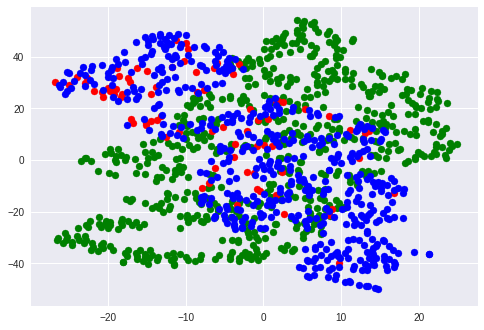

In [17]:
plotTrainTestScatter(phone)

#### PCA

In [99]:
X_train.shape

(275, 1950)

In [0]:
n_components = X_train.shape[0]
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

<BarContainer object of 275 artists>

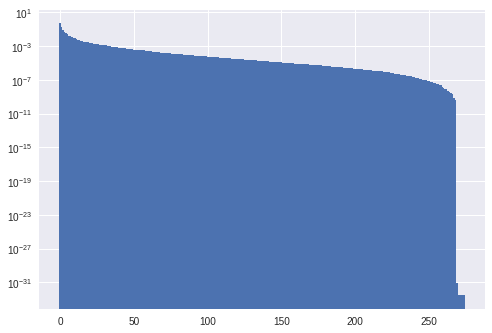

In [101]:
plt.bar(range(n_components),pca.explained_variance_ratio_,1,log=True)

In [0]:
n_components = 248
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

In [0]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### MODEL

In [104]:
clf = svm.OneClassSVM(nu=0.1,kernel='rbf')
clf = clf.fit(X_train_pca)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
y_pred = clf.predict(X_test_pca) #pca ones here also

In [0]:
y_pred[y_pred == -1] = 0

In [107]:
print("Phone: ", phone)
print(classification_report(y_test, y_pred, target_names=['Mispronounced','Correct']))
print(confusion_matrix(y_test, y_pred, labels=range(2)))

print(sklm.roc_curve(y_test,y_pred))
print('FAR = ', sklm.roc_curve(y_test,y_pred)[0][1]*100,'%')
print('FRR = ', (1 - sklm.roc_curve(y_test,y_pred)[1][1])*100,'%')
print("AUC_SCORE = ", sklm.roc_auc_score(y_test,y_pred)*100,'%')

Phone:  AA
               precision    recall  f1-score   support

Mispronounced       0.17      1.00      0.29        76
      Correct       0.00      0.00      0.00       375

    micro avg       0.17      0.17      0.17       451
    macro avg       0.08      0.50      0.14       451
 weighted avg       0.03      0.17      0.05       451

[[ 76   0]
 [375   0]]
(array([0., 1.]), array([0., 1.]), array([1, 0]))
FAR =  100.0 %
FRR =  0.0 %
AUC_SCORE =  50.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
